In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
nz = 100

image_size = 28

ngpu = 1

# Decide which device we want to run on
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
# Generator
# input = random vector, output = fake image
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Linear(in_features=nz, out_features=256),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(256, momentum=0.8),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(512, momentum=0.8),
            
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.BatchNorm1d(1024, momentum=0.8),
            
            nn.Linear(1024, image_size*image_size),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

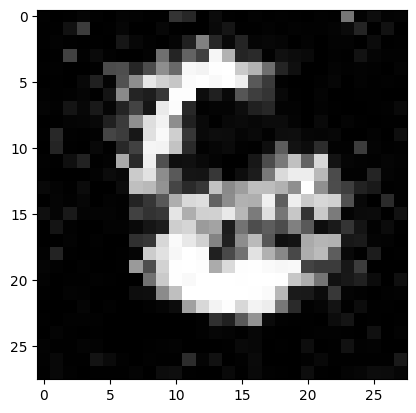

In [32]:
# Load model
generator = Generator(ngpu).to(device)
generator.load_state_dict(torch.load("./mnist-normal-gan-model.pt", weights_only=True))

# Set the generator to evaluation mode
generator.eval()

# Generate a sample noise vector
sample_noise = torch.randn(1, nz, device=device)

# Generate an image from the noise vector
X = generator(sample_noise).detach().cpu()

# Plot the generated image
plt.imshow(X.view(image_size, image_size), cmap='gray')
plt.show()